On Google Colab, ensure you have the correct settings

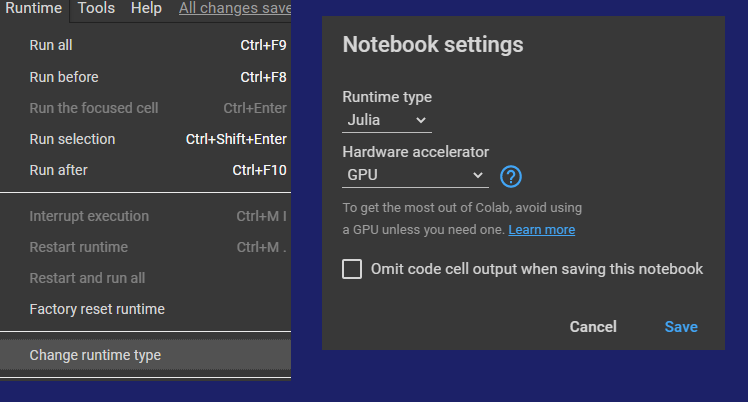

---
# References

This work is based on 
https://colab.research.google.com/github/ageron/julia_notebooks/blob/master/Julia_Colab_Notebook_Template.ipynb

---
Packages

https://juliapackages.com/packages

---

# Install <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> 

## Execute the following cell 
(click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.


In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

---
# Reload this page
(press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

---

# Add Packages

## Check version info

In [ ]:
versioninfo()

## Install

In [ ]:
import Pkg
Pkg.add("CSV"); 
Pkg.add("DataFrames"); 
Pkg.add("LinearAlgebra"); 
Pkg.add("Statistics"); 
Pkg.add("PyPlot")
Pkg.add("StatsBase"); 
Pkg.add("XGBoost"); 
Pkg.add("DecisionTree");
Pkg.add("FileIO"); 
Pkg.add("Random"); 
Pkg.add("CUDA"); 

## Import Packages

In [ ]:
using CSV, DataFrames, LinearAlgebra, Statistics, Dates, Random, XGBoost, DecisionTree, FileIO, Random, Base.Threads

In [ ]:
using PyPlot: plot as plot, bar as bar, scatter as scatter, legend as legend, show as show, title as title, hist as hist

In [ ]:
plot()

In [ ]:
using CUDA

In [ ]:
CUDA.allowscalar(false)
cu(rand(10,10))

everything has been set up. Start Computing!

In [ ]:
x=10.0.*rand(Float32, 10).+5

In [ ]:
hist(x)

In [ ]:
a=rand(Float32, 1, 199)

In [ ]:
x.^a

In [ ]:
range(0,99,length=100)

In [ ]:
collect(range(0,99,length=100))'

In [ ]:
p=Int64.(collect(range(0,99,length=100))')

# Usage Examples

## Plots

In [ ]:
plot(sin.(0:0.1:2*3.14), label="sin(x) x in 0:2pi")
legend()

## Matrices

In [ ]:
X=rand(1_000,10_000)
Y=rand(10_000,1_000)

In [ ]:
X*Y

In [ ]:
t1=now()
for i=1:10 
  X*Y 
end
t2=now()
t2-t1

In [ ]:
cuX = cu(X)
cuY = cu(Y)

In [ ]:
cuX*cuY

In [ ]:
t1c=now()
for i=1:10 cuX*cuY end
t2c=now()
t2c-t1c

In [ ]:
scale_up = (t2-t1)/(t2c-t1c)

## Loops

In [ ]:
for i=1:100_000
  if i in 1:1000:100_000
    @show i, sqrt(i)
    #println(i," ",sqrt(i))
  end
end

## Parallel Loops

In [ ]:
@threads for i=1:100_000
  if i in 1:1000:100_000
    println(i," ",sqrt(i)," ",threadid())
  end
end

In [ ]:
Threads.nthreads()

## QR

In [ ]:
mat=rand(Float32, 10_000,10)

In [ ]:
mat = [mat 2mat -3mat]

In [ ]:
k=rank(mat)

In [ ]:
q=qr(mat,Val(true));

In [ ]:
idx =  sort(q.p[1:k])

In [ ]:
rank(mat[:,idx])

In [ ]:
xx = ones(10,3)

In [ ]:
sin.(xx)

In [ ]:
f(x) = tanh(sin(exp(x)))

In [ ]:
mat=rand(10,100)

In [ ]:
f.(mat)

In [ ]:
cu_mat = cu(mat)

In [ ]:
f.(cu_mat)

In [ ]:
function g(x)
  v = sum(x)
  k = log(abs(v) + 1)
  return k 
end

In [ ]:
nn = 1:100:1000
mean_all = zeros(length(nn))
k=0
for n in nn
  vec_mean = []
  for i=1:10
    mat = rand(n, n).-1/2
    push!(vec_mean,mean(mat))
  end
  k+=1
  mean_all[k] = mean(vec_mean)
end

In [ ]:
plot(nn,mean_all)

## Cross Validation Sampling

---
# Regression
---

## Generate Data

In [ ]:
xx=rand(100_000,10)

In [ ]:
yy=sum(sin.(xx),dims=2)[:].+(rand(size(xx,1)).-1/2)./2

## Calculate Weights

We assume that xx*aa = yy

In [ ]:
@time aa=xx\yy

In [ ]:
plot(aa)

In [ ]:
cuxx=cu(xx)
cuyy=cu(yy)
@time aa=cuxx'*cuxx\cuxx'*cuyy

In [ ]:
aa=Vector(aa)

In [ ]:
bar(string.(1:10),aa,label="Regression Weights")
legend()

## Predict

In [ ]:
pred=xx*aa

In [ ]:
scatter(pred,yy)
title(string(cor(pred,yy)))

## Add nonlinear Terms

In [ ]:
aa=[xx xx.^2 xx.^3]\yy

In [ ]:
bar(string.(1:length(aa)),aa,label="Regression Weights")
legend()
show()

In [ ]:
mean(aa[11:20])

In [ ]:
mean(aa[21:end])

In [ ]:
pred=[xx xx.^2 xx.^3]*aa

In [ ]:
scatter(pred[1:10:end],yy[1:10:end])
title(cor(pred,yy))

## Error Analysis

In [ ]:
err = yy .- pred

In [ ]:
hist(err)

In [ ]:
scatter(yy[1:10:end],err[1:10:end],label="Errors vs Target")
legend()

In [ ]:
cor(yy,err)

In [ ]:
iso = sortperm(err[:])[1:10:end]

In [ ]:
plot(err[iso])

## Predict for out-of-sample

In [ ]:
xx_te=rand(10_000,10)
yy_te=sum(sin.(xx_te),dims=2)[:]
pred_te=[xx_te xx_te.^2 xx_te.^3]*aa
scatter(pred_te,yy_te)
title(cor(pred_te,yy_te))

In [ ]:
scatter(pred[1:10:end],yy[1:10:end])
title(cor(pred,yy))

In [ ]:
pred_te=[xx_te xx_te.^2 xx_te.^3]*aa
scatter(pred_te,yy_te,label="Test-Set")
title(cor(pred_te,yy_te))
legend()

# Decision Trees

## Clasification

In [ ]:
obs=1_000
vars=1
xx = rand(obs)
yy = zeros(obs)
yy[0.7.<=xx.<0.9] .= 1.0
yy[0.5.<xx.<0.6] .= 1.0
yy[0.3.<xx.<0.35] .= 1.0
scatter(xx,yy)

### Fit and investigate model

In [ ]:
model = DecisionTreeClassifier(max_depth=100)
DecisionTree.fit!(model, xx[:,:], yy)
DecisionTree.print_tree(model)

### Predict for out of sample observations

In [ ]:
xx_te = rand(obs)
scatter(xx,yy,label="Train")
scatter(xx_te, DecisionTree.predict(model, xx_te[:,:]),label="Test")
legend()

## Regression

### Generate Data

run and then change noise_factor to 1.0

In [ ]:
noise_factor = 1.0
obs = 10_000
vars = 10
xx = 10rand(obs,vars)
yy = (xx./10).^2 .* sin.(xx)
yy = sum(yy,dims=2)[:] .+ noise_factor.*(rand(obs).-1/2) ## WITH NOISE
scatter(xx[:,1],yy)

In [ ]:
scatter(xx[:,2],yy)

In [ ]:
aa=xx\yy
pred=xx*aa
scatter(xx*aa,yy)
title(round(cor(xx*aa,yy),digits=5))

### Build Tree

In [ ]:
model = DecisionTreeRegressor(max_depth=1000)
DecisionTree.fit!(model, xx, yy)
pred=DecisionTree.predict(model, xx)
xx_te = 10rand(obs,vars)
yy_te = (xx_te./10).^2 .* sin.(xx_te)
yy_te = sum(yy_te,dims=2)[:]
pred_te = DecisionTree.predict(model, xx_te)
scatter(pred_te,yy_te,label="Test")
title(cor(pred_te,yy_te))
legend()

### Print Model

In [ ]:
DecisionTree.print_tree(model)

### Create a Random Forest

In [ ]:
model_all = []
ir_col_all = []
n_trees = 100
perc_col = 0.8; n_col = Int64(round(perc_col*vars))
perc_row = 0.7; n_row= Int64(round(perc_row*obs))
@time for i ∈ 1:n_trees
    ir_col = randperm(vars)[1:n_col]    
    ir_row = randperm(obs)[1:n_row]
    model_i = DecisionTreeRegressor(max_depth=100)
    DecisionTree.fit!(model_i, xx[ir_row,ir_col], yy[ir_row])
    push!(model_all, model_i); push!(ir_col_all,ir_col)
end

### Predict

In [ ]:
pred=zeros(obs,n_trees)
pred_te=zeros(obs,n_trees)
for i ∈ 1:n_trees
    pred[:,i] .= DecisionTree.predict(model_all[i], xx[:,ir_col_all[i]])
    pred_te[:,i] .= DecisionTree.predict(model_all[i], xx_te[:,ir_col_all[i]])
end
pred=mean(pred,dims=2)[:]
scatter(pred,yy)
title(cor(pred,yy))

In [ ]:
pred_te=mean(pred_te,dims=2)[:]
scatter(pred_te,yy_te)
title(string("Test Pearson: ",cor(pred_te,yy_te)))

### Create a Random Forest in Parallel

In [ ]:
n_trees = 100
model_all = Vector{DecisionTreeRegressor}(undef,n_trees)
perc_col = 0.8; n_col = Int64(round(perc_col*vars))
perc_row = 0.7; n_row= Int64(round(perc_row*obs))
ir_col_all = zeros(Int64,n_trees,n_col)
@time @threads for i ∈ 1:n_trees
    ir_col = randperm(vars)[1:n_col]
    ir_row = randperm(obs)[1:n_row]
    model_i = DecisionTreeRegressor(max_depth=100)
    DecisionTree.fit!(model_i, xx[ir_row,ir_col], yy[ir_row])
    model_all[i] = model_i
    ir_col_all[i,:] .= ir_col
end

In [ ]:
ir_col_all

In [ ]:
model_all[1]

In [ ]:
model_all[2]

### Predict

In [ ]:
pred=zeros(obs,n_trees)
pred_te=zeros(obs,n_trees)
for i ∈ 1:n_trees
    pred[:,i] .= DecisionTree.predict(model_all[i], xx[:,ir_col_all[i,:]])
    pred_te[:,i] .= DecisionTree.predict(model_all[i], xx_te[:,ir_col_all[i,:]])
end
pred=mean(pred,dims=2)[:]
scatter(pred,yy)
title(cor(pred,yy))

In [ ]:
pred_te=mean(pred_te,dims=2)[:]
scatter(pred_te,yy_te)
title(cor(pred_te,yy_te))